PROBLEM STATEMENT:To predict how likely individuals are to receive their H1N1 and seasonal flu vaccines

In [99]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
#setting  up working directory folder
import os
os.chdir('C:/Users/91918/OneDrive/Desktop/Datasets')

In [101]:
x_train=pd.read_csv("training_set_features.csv")

In [102]:
x_test=pd.read_csv("test_set_features.csv")

In [103]:
y_labels=pd.read_csv("training_set_labels.csv")

In [104]:
x_train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [105]:
x_train .dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [106]:
print(x_train.shape)
print(x_test.shape)
print(y_labels.shape)

(26707, 36)
(26708, 36)
(26707, 3)


In [107]:
# missing value imptation
x_train.isnull().sum().sort_values(ascending=False)

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_children               249
household_adults                 249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

In [108]:
x_test.isnull().sum().sort_values(ascending=False)

employment_occupation          13426
employment_industry            13275
health_insurance               12228
income_poverty                  4497
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2036
employment_status               1471
marital_status                  1442
education                       1407
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
opinion_seas_sick_from_vacc      521
opinion_seas_risk                499
opinion_seas_vacc_effective      452
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
household_children               225
household_adults                 225
behavioral_avoidance             213
behavioral_touch_face            128
h1n1_knowledge                   122
h1n1_concern                      85
behavioral_outside_home           82
behavioral_antiviral_meds         79
b

In [109]:
# Since there are missing values in both Train and Test Set Im combining both the Datasets
combinedf = pd.concat([x_train,x_test],axis=0) # Row Concatenation 

In [110]:
combinedf.info()
# Many Variables have Null Values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_mo

 missing value algorithm   knn imputer based on k-nearest neighbhors algorithm
k nearest algorithm is one of the algorithm which is a distance matrix
missing value and the closet to distance neighbour will be used for computatation


In [111]:
from sklearn.preprocessing import LabelEncoder


In [112]:
stringcols=combinedf.drop(['respondent_id'],axis=1)

In [113]:
stringcols=stringcols.astype(str).apply(lambda series:pd.Series(
LabelEncoder().fit_transform(series[series.notnull()]),
index = series[series.notnull()].index))

In [114]:
from sklearn.impute import KNNImputer

In [115]:
imputer = KNNImputer()

In [116]:
stringcolsimp = imputer.fit_transform(stringcols)

In [117]:
stringcolsimp = pd.DataFrame(stringcolsimp,columns=stringcols.columns)

In [118]:
stringcolsimp.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,1.0,0.0,1.0,8.0,2.0,0.0,0.0,10.0,11.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,13.0,20.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,1.0,0.0,0.0,9.0,0.0,2.0,0.0,15.0,22.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,5.0,1.0,0.0,0.0,10.0,11.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0,19.0,5.0


splitting back the data to train and test

In [119]:
traindf = stringcolsimp.loc[0:26706]

In [120]:
testdf = stringcolsimp.loc[26708:53415]

In [121]:
traindf.shape

(26707, 35)

In [122]:
testdf.shape

(26707, 35)

Data visualisation on seasonal_vaccine

C:\ana\archana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='seasonal_vaccine', ylabel='sex'>

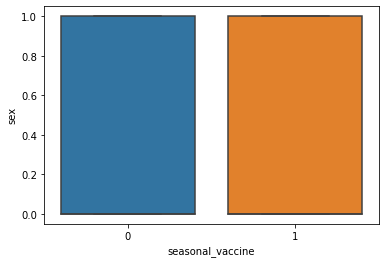

In [123]:
import seaborn as sns
sns.boxplot(y_labels.seasonal_vaccine,traindf.sex)

C:\ana\archana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='seasonal_vaccine', ylabel='income_poverty'>

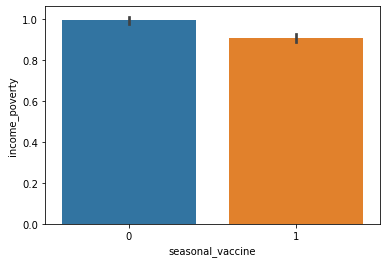

In [124]:

sns.barplot(y_labels.seasonal_vaccine,traindf.income_poverty)

C:\ana\archana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='seasonal_vaccine', ylabel='education'>

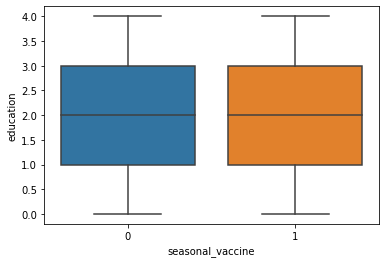

In [125]:
sns.boxplot(y_labels.seasonal_vaccine,traindf.education)

b.H1N1 Vaccine

C:\ana\archana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='h1n1_vaccine', ylabel='sex'>

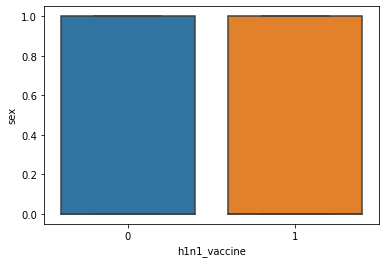

In [126]:
sns.boxplot(y_labels.h1n1_vaccine,traindf.sex)

C:\ana\archana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='h1n1_vaccine', ylabel='income_poverty'>

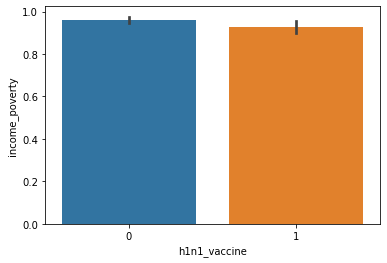

In [127]:
sns.barplot(y_labels.h1n1_vaccine,traindf.income_poverty)

C:\ana\archana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='h1n1_vaccine', ylabel='education'>

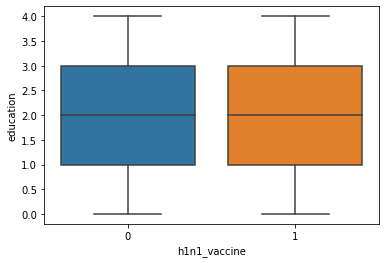

In [128]:
sns.boxplot(y_labels.h1n1_vaccine,traindf.education)

<AxesSubplot:ylabel='Frequency'>

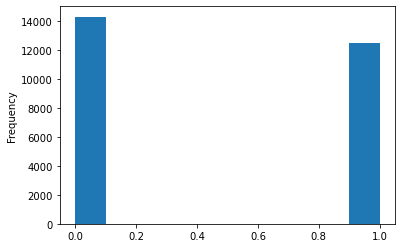

In [129]:
y_labels.seasonal_vaccine.plot(kind='hist')
# Balanced Data

In [132]:
y_labels.seasonal_vaccine.value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

<AxesSubplot:ylabel='Frequency'>

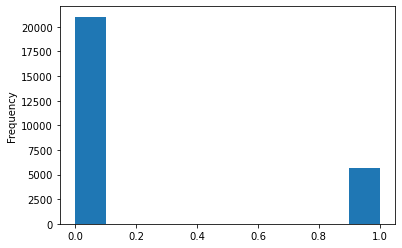

In [133]:
y_labels.h1n1_vaccine.plot(kind='hist')
# Imbalance Data

Model Building and Idealogy :
As there are two binary variables to target, Let's create a classification model for each variable separately.
The variable seasonal vaccine is balanced, whereas the h1n1 vaccine variable is not.
Let's use SMOTE to balance the h1n1 vaccine variable.

In [283]:
y=y_labels.seasonal_vaccine

In [284]:
X=traindf

In [136]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
logit = LogisticRegression(max_iter=400)


In [139]:
logitmodel= logit.fit(X,y)

In [140]:
logitmodel.score(X,y)


0.7611113191298161

In [141]:
cross_val_score(logitmodel,X,y)

array([0.75720704, 0.7588918 , 0.76427635, 0.76652312, 0.75360419])

In [142]:
np.mean([0.75720704, 0.7588918 , 0.76427635, 0.76652312, 0.75360419])

0.7601005

In [143]:
logitpredict = logitmodel.predict(X)

In [144]:
logitpredict_test = logitmodel.predict_proba(testdf)


In [145]:
pd.DataFrame(logitpredict_test).to_csv("seaslog.csv")

In [146]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     14272
           1       0.75      0.73      0.74     12435

    accuracy                           0.76     26707
   macro avg       0.76      0.76      0.76     26707
weighted avg       0.76      0.76      0.76     26707



C:\ana\archana\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


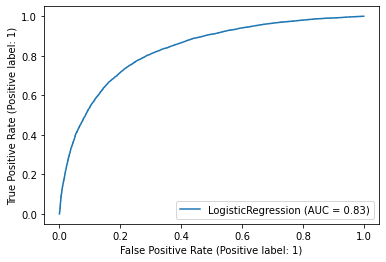

In [147]:
plot_roc_curve(logitmodel,X,y)

Decision Tree Classification for Seasonal Vaccine

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
dtc = DecisionTreeClassifier(max_depth=15)

In [152]:
dtcmodel = dtc.fit(X,y)


In [153]:
dtcmodel.score(X,y)


0.9226045606020893

In [154]:
cross_val_score(dtcmodel,X,y)

array([0.70160988, 0.71714714, 0.70866879, 0.7227111 , 0.69986894])

In [184]:
np.mean([0.70160988, 0.71714714, 0.70866879, 0.7227111 , 0.69986894])

0.7100011700000001

In [185]:
dtcpredict = dtcmodel.predict(X)

In [186]:
dtcpredict_test = dtcmodel.predict(testdf)

In [187]:
pd.DataFrame(dtcpredict_test).to_csv("dtcseas.csv")

In [188]:
print(classification_report(y,dtcpredict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     14272
           1       0.92      0.91      0.92     12435

    accuracy                           0.92     26707
   macro avg       0.92      0.92      0.92     26707
weighted avg       0.92      0.92      0.92     26707



C:\ana\archana\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


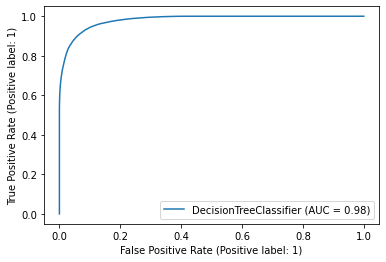

In [189]:
plot_roc_curve(dtc,X,y)

Random Forest Classification for Seasonal Vaccine

In [190]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
rfc = RandomForestClassifier(n_estimators=3)

In [192]:
rfcmodel = rfc.fit(X,y)

In [193]:
rfcmodel.score(X,y)

0.9462687684876624

In [194]:
cross_val_score(rfcmodel,X,y)

array([0.71789592, 0.71471359, 0.71952818, 0.7105411 , 0.7051114 ])

In [195]:
np.mean([0.71789592, 0.71471359, 0.71952818, 0.7105411 , 0.7051114 ])

0.7135580380000001

In [196]:
rfcpredict = rfcmodel.predict(X)

In [197]:
rfcpredict_test = rfcmodel.predict_proba(testdf)

In [198]:
pd.DataFrame(rfcpredict_test).to_csv('rfcseas.csv')

In [199]:
print(classification_report(y,rfcpredict))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14272
           1       0.94      0.94      0.94     12435

    accuracy                           0.95     26707
   macro avg       0.95      0.95      0.95     26707
weighted avg       0.95      0.95      0.95     26707



C:\ana\archana\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


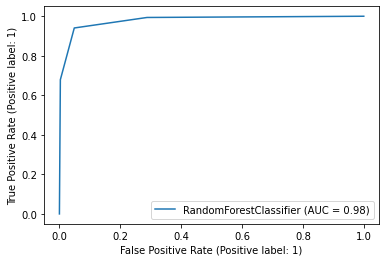

In [200]:
plot_roc_curve(rfcmodel,X,y)

Gradient Boosting Classification for Seasonal Vaccine

In [285]:
from sklearn.ensemble import GradientBoostingClassifier

In [286]:
gbm= GradientBoostingClassifier(n_estimators=400)

In [287]:
gbmmodel = gbm.fit(X,y)

In [288]:
gbmmodel.score(X,y)

0.8051447186130977

In [289]:
cross_val_score(gbmmodel,X,y)

array([0.78453763, 0.78435043, 0.79179929, 0.7931099 , 0.78805467])

In [290]:
np.mean([0.78453763, 0.78435043, 0.79161206, 0.7931099 , 0.78805467])

0.7883329379999999

In [291]:
gbmpredict = gbmmodel.predict(X)

In [292]:
gbmpredict_test = gbmmodel.predict_proba(testdf)

In [293]:
pd.DataFrame(gbmpredict_test).to_csv('gbmseas.csv')


In [294]:
print(classification_report(y,gbmpredict))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82     14272
           1       0.80      0.78      0.79     12435

    accuracy                           0.81     26707
   macro avg       0.80      0.80      0.80     26707
weighted avg       0.81      0.81      0.80     26707



C:\ana\archana\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


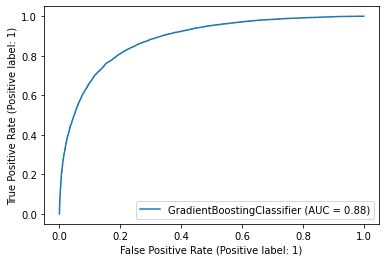

In [295]:
plot_roc_curve(gbmmodel,X,y)

Balancing the Imbalance data using Smote

In [266]:
y1=y_labels.h1n1_vaccine

In [267]:
from imblearn.over_sampling import SMOTE

In [268]:
smote = SMOTE(random_state=60)

In [269]:
X_smote,y_smote = smote.fit_resample(X,y1)

In [270]:
print(pd.DataFrame(y1).value_counts())
print(pd.DataFrame(y_smote).value_counts())

h1n1_vaccine
0               21033
1                5674
dtype: int64
h1n1_vaccine
0               21033
1               21033
dtype: int64


Logistic Regression for H1N1 Vaccine


In [271]:
print(X_smote.shape)
print(y_smote.shape)

(42066, 35)
(42066,)


In [227]:
logit2 = LogisticRegression(max_iter=400)

In [228]:
logitmodel_smote = logit2.fit(X_smote,y_smote)


In [229]:
logitmodel_smote.score(X_smote,y_smote)

0.7633956164123045

In [230]:
cross_val_score(logitmodel_smote,X_smote,y_smote)

array([0.75112907, 0.75799358, 0.76595745, 0.77154404, 0.7677404 ])

In [231]:
np.mean([0.75112907, 0.75799358, 0.76595745, 0.77154404, 0.7677404 ])

0.762872908

In [232]:
logitsmote_predict = logitmodel_smote.predict(X_smote)

In [234]:
logitsmote_predict_test = logitmodel_smote.predict_proba(testdf)

In [235]:
pd.DataFrame(logitsmote_predict_test).to_csv('h1n1log.csv')

In [236]:
print(classification_report(y_smote,logitsmote_predict))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76     21033
           1       0.76      0.77      0.76     21033

    accuracy                           0.76     42066
   macro avg       0.76      0.76      0.76     42066
weighted avg       0.76      0.76      0.76     42066



C:\ana\archana\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


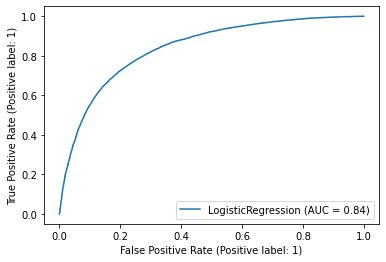

In [237]:
plot_roc_curve(logitmodel_smote,X_smote,y_smote)

Decision Tree Classification for H1N1 Vaccine 

In [238]:
treesmote = DecisionTreeClassifier(max_depth=12)

In [239]:
treemodel_smote = treesmote.fit(X_smote,y_smote)

In [240]:
treemodel_smote.score(X_smote,y_smote)


0.9146579185090097

In [241]:
cross_val_score(treemodel_smote,X_smote,y_smote)

array([0.68861421, 0.85558065, 0.92832521, 0.93284203, 0.92654226])

In [242]:
np.mean([0.68873306, 0.85700701, 0.92891953, 0.93367408, 0.92499703])

0.8666661419999999

In [243]:
treepredict_smote = treemodel_smote.predict(X_smote)

In [244]:
treepredict_smote_test =treemodel_smote.predict_proba(testdf)

In [245]:
pd.DataFrame(treepredict_smote_test).to_csv('h1n1tree.csv')

In [246]:
print(classification_report(y_smote,treepredict_smote))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     21033
           1       0.94      0.88      0.91     21033

    accuracy                           0.91     42066
   macro avg       0.92      0.91      0.91     42066
weighted avg       0.92      0.91      0.91     42066



C:\ana\archana\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


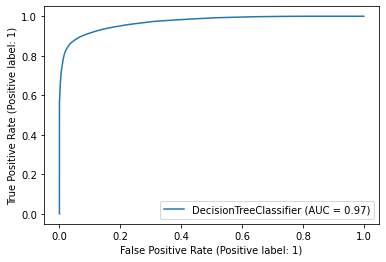

In [247]:
plot_roc_curve(treemodel_smote,X_smote,y_smote)

Random Forest Classification for H1N1 Vaccine

In [248]:
RFsmote = RandomForestClassifier(n_estimators=10,max_depth=13)

In [249]:
RFmodel_smote = RFsmote.fit(X_smote,y_smote)

In [250]:
RFmodel_smote.score(X_smote,y_smote)


0.9387628964008938

In [251]:
cross_val_score(RFmodel_smote,X_smote,y_smote)

array([0.69099121, 0.88054202, 0.95316772, 0.95625817, 0.95067158])

In [252]:
np.mean([0.69015926, 0.88291929, 0.95506954, 0.95269226, 0.95328658])

0.8868253860000002

In [253]:
RFsmote_predict = RFmodel_smote.predict(X_smote)

In [254]:
RFsmote_predict_test = RFmodel_smote.predict(testdf)

In [255]:
pd.DataFrame(RFsmote_predict_test).to_csv('h1h1RF.csv')

In [256]:
print(classification_report(y_smote,RFsmote_predict))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     21033
           1       0.96      0.91      0.94     21033

    accuracy                           0.94     42066
   macro avg       0.94      0.94      0.94     42066
weighted avg       0.94      0.94      0.94     42066



C:\ana\archana\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


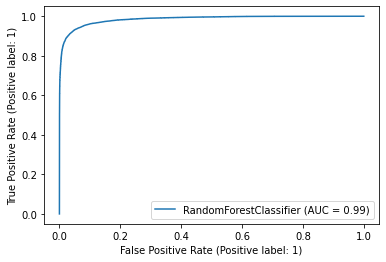

In [257]:
plot_roc_curve(RFmodel_smote,X_smote,y_smote)


In [ ]:
gradient boosting classifier for H1N1 vaccine

In [274]:
gbm_smote = GradientBoostingClassifier(n_estimators=400)

In [275]:
gbmmodel_smote = gbm_smote.fit(X_smote,y_smote)

In [276]:
gbmmodel_smote.score(X_smote,y_smote)

0.9160129320591451

In [277]:
cross_val_score(gbmmodel_smote,X_smote,y_smote)

array([0.64535298, 0.88553429, 0.96576726, 0.96648045, 0.96315226])

In [164]:
np.mean([0.64761112, 0.88553429, 0.9656484 , 0.96552954, 0.96196363])

0.8852573959999999

In [278]:
gbmpredict_smote = gbmmodel_smote.predict(X_smote)

In [279]:
gbmpredict_smote_test = gbmmodel_smote.predict_proba(testdf)

In [280]:
pd.DataFrame(gbmpredict_smote_test).to_csv('h1n1gbm.csv')

In [281]:
print(classification_report(y_smote,gbmpredict_smote))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     21033
           1       0.95      0.88      0.91     21033

    accuracy                           0.92     42066
   macro avg       0.92      0.92      0.92     42066
weighted avg       0.92      0.92      0.92     42066



C:\ana\archana\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


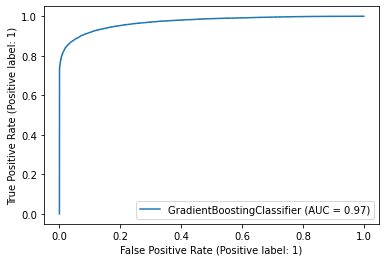

In [282]:
plot_roc_curve(gbmmodel_smote,X_smote,y_smote)

In [1]:
from PIL import Image

In [2]:
img = Image.open('report.png')

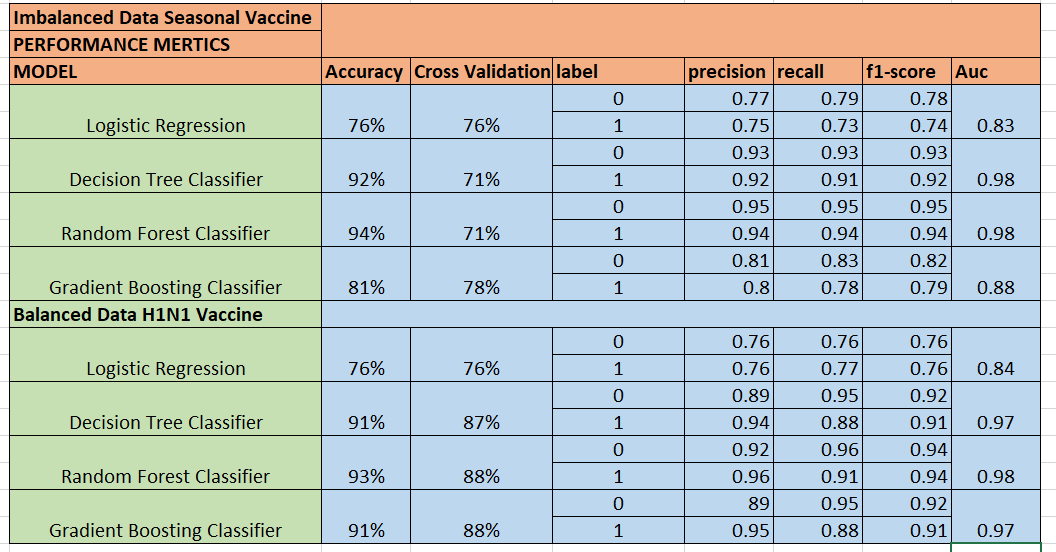

In [3]:
img

conclusion:prediction of the two flu shot learning predict H1N1 and Seasonal vaccines  for seasonal vaccine Random forest classifier performance with 94% and for H1N1 vaccine is 93%